In [8]:
import pandas as pd
pima = pd.read_csv('./pima-indians-diabetes-database/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']
X = pima[feature_cols]
y = pima['Outcome']

#### Question can we predict Diabaties status of a patient based on health measurements

In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression()
lg_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
y_pred_class = lg_clf.predict(X_test)

#### Classification Accuaracy: percentage of correct predictions

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_class)

0.69270833333333337

#### Null Accuracy: Accuracy that could be achieved by always predicting the most frequent class

In [14]:
# examine the distribution of classes
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [15]:
# percentage of ones 
y_test.mean()

0.32291666666666669

In [16]:
# percentage of zeros
1 - y_test.mean()

0.67708333333333326

In [17]:
# calculate null accuaracy
max(y_test.mean(), 1-y_test.mean())

0.67708333333333326

Consclusion:
  1. Classification is easy metric to understand
  2. But it doesn't tell you the underlying distribution of values
  3. And it doesn't tell you what "types" of errors your classifier is making

## Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_class)

array([[118,  12],
       [ 47,  15]], dtype=int64)

1. <b>true positives (TP)</b>: These are cases in which we predicted yes (they have the disease), and they do have the disease.
2. <b>true negatives (TN)</b>: We predicted no, and they don't have the disease.
3. <b>false positives (FP)</b>: We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
4. <b>false negatives (FN)</b>: We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

In [20]:
confusion = confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

## Metrics Computed from Confusion Matrix

<b> Classification Accuracy:</b> Overall, how often your classifier is correct

In [23]:
print((TP+TN)/(TP+TN+FP+FN))
print(accuracy_score(y_test, y_pred_class))

0.692708333333
0.692708333333


<b> Classification Error:</b> Overall, how often your classifier is incorrect

In [24]:
print(((FN+FP)/(FN+FP+TN+TP)))
print(1-accuracy_score(y_test, y_pred_class))

0.307291666667
0.307291666667


<b>Sensitivity(Recall):</b> When the Actual value is positive how often it is the prediction correct 
    1. How "sensitive" is the classifier to detecting positive instances
    2. Also known as "True Positive Rate" or "Recall"

In [26]:
from sklearn.metrics import recall_score
print(TP/(TP+FN))
print(recall_score(y_test, y_pred_class))

0.241935483871
0.241935483871


<b>Specifivity:</b> When the Actual value is negative, how often it is the prediction correct
    1. How "specific"(or "selective") is the classifier in predicting positive instances

In [28]:
print(TN/(TN+FP))
print(recall_score(y_test==0, y_pred_class==0))

0.907692307692
0.907692307692


<b>Precision:</b> When a positive value is predicted, how often is the prediction correct 
1. How "precise" is classifier when predicting postive instances?

In [30]:
from sklearn.metrics import precision_score
print(TP/(TP+FP))
print(precision_score(y_test, y_pred_class))

0.555555555556
0.555555555556


Many other metrics can be computed: F1-score, Mathews correlation coefficient

<b>Conclusion</b>
1. Confusion matrix gives you a more complete picture of how your classifier is performing 
2. Also allows you to compute various classification metrics, and these metrics can guide your model selection

<b> What metrics should we focus on </b>
1. choice of your metric depends on business objective
2. <b>Spam filter(positive class is "spam"):</b> Optimize for <b>precision or specificity</b> bacause false negative(spam goes to inbox) are more acceptable than the false positives (non-spam is caught by the spam filter)
3. <b> Fradulent Transaction detection:(positive class is Fraud):</b> Optimize for sensitivity because false postive(normal tractions that are flagged fraud) is acceptable than false negatives (fradulent transactions) that are not detected 

## Adjusting the classification Threshold

In [31]:
lg_clf.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [32]:
lg_clf.predict_proba(X_test)[:10]

array([[ 0.63247571,  0.36752429],
       [ 0.71643656,  0.28356344],
       [ 0.71104114,  0.28895886],
       [ 0.5858938 ,  0.4141062 ],
       [ 0.84103973,  0.15896027],
       [ 0.82934844,  0.17065156],
       [ 0.50110974,  0.49889026],
       [ 0.48658459,  0.51341541],
       [ 0.72321388,  0.27678612],
       [ 0.32810562,  0.67189438]])

In [37]:
y_pred_prob = lg_clf.predict_proba(X_test)[:,1]

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14


Text(0,0.5,'Fequency')

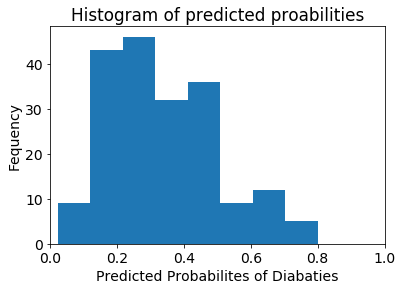

In [39]:
plt.hist(y_pred_prob,bins=8)
plt.xlim(0,1)
plt.title('Histogram of predicted proabilities')
plt.xlabel('Predicted Probabilites of Diabaties')
plt.ylabel('Fequency')

#### 1.  Decrease the threshold for predicting Diabaties in order to increase the recall(Sensitivity) of the classifier
#### 2. Increase the threshold for predicting Diabaties in order to increase the precision of the classifier(Not Sure)

In [47]:
from sklearn.preprocessing import binarize
import numpy as np
y_pred_class_dec_thres = binarize(y_pred_prob[:,np.newaxis], 0.3)[:,0]

In [51]:
print("Previous recall is %.2f"%recall_score(y_test, y_pred_class))
print("Recall after descreasing the threshold is %.2f"%recall_score(y_test, y_pred_class_dec_thres))

Previous recall is 0.24
Recall after descreasing the threshold is 0.74


In [64]:
y_pred_class_inc_thres = binarize(y_pred_prob[:,np.newaxis], 0.7)[:,0]

In [66]:
print("Previous Precision is %.2f"%precision_score(y_test, y_pred_class))
print("Precision after Increasing the threshold is %.2f"%precision_score(y_test, y_pred_class_inc_thres))

Previous Precision is 0.56
Precision after Increasing the threshold is 0.80


<b>Conclusion</b>:
    1. Threshold of 0.5 is used by default(for binary problems) to convert predicted in to class predictions
    2. Threshold can be adjusted to increase the Sensitivity(Recall) or Decrease the Specificity
    3. Sensitivity and Specificity has inverse relationship

## ROC curves and Area Under the curve(AUC)

<b>Question:</b> Wouldn't be nice if we would see how sentivity and specificity are effected by the various thresholds, with out actually changing the threshold?
<b>Answer:</b> Plot the ROC curve